# Introduction to NLP Fundamentals in Tensorflow

---
### Typical architecture:

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Hyperparameter/Layer type</th>
    <th style="text-align: center;">What does it do?</th> 
    <th style="text-align: center;">Typical values</th>
  </tr>
  <tr>
    <td style="text-align: left;">Input text(s)</td>
    <td style="text-align: left;">Target texts/sequences you'd like to discover patterns in</td> 
    <td style="text-align: left;">Whatever you can represent as text or sequence</td>
  </tr>
  <tr>
    <td style="text-align: left;">Input layer</td>
    <td style="text-align: left;">Takes in target sequence</td> 
    <td style="text-align: left; font-family: 'Courier New', Courier, monospace; font-size: 14px;">input_shape = [batch_size, embedding_size] or [batch_size, sequence_shape]</td>
  </tr>
  <tr>
    <td style="text-align: left;">Text vectorization layer</td>
    <td style="text-align: left;">Maps input sequences to numbers</td> 
    <td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.TextVectorization</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Embedding</td>
    <td style="text-align: left;">Turns mapping of text vectors to embedding matrix</td> 
<td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Embedding</span></td> 
  </tr>
  <tr>
    <td style="text-align: left;">RNN cells(s)</td>
    <td style="text-align: left;">Find patterns in sequences</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">SimpleRNN, LSTM, GRU</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Hidden activation</td>
    <td style="text-align: left;">Adds non-linearity to learned features</td>
    <td style="text-align: left; font-size: 14px;">Usually Tanh hyperbolic tangent) (<span style="color: blue; text-decoration: underline;">tf.keras.activations.tanh</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Pooling layer</td>
    <td style="text-align: left;">Reduces the dimensionality of learned sequences features (usually for Conv1D models)</td>
    <td style="text-align: left;">Average (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalAveragePooling1D</span>) or Max (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalMaxPool1D</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Fully connected layer</td>
    <td style="text-align: left;">Further refines learned features from recurrent layers</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Dense</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Output layer</td>
    <td style="text-align: left;">Takes learned features and outputs them in shape of taget labels</td>
    <td style="text-align: left;font-size: 14px;"><span style="font-family: 'Courier New', Courier, monospace; font-size: 14px;">output_shape = [number_of_classes]</span> (e.g. 2 for Diaster or Not Diaster)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Output activation</td>
    <td style="text-align: left;">Adds non-linearities to output layer</td>
    <td style="text-align: left;font-size: 14px;"><span style="color: blue; text-decoration: underline;">tf.keras.activations.sigmoid</span> (binary classification) or <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.activations.softmax</span></td>
  </tr>
</table>

### Get helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-29 21:18:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.108.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 10246 (10K) [text/plain]
Grabando a: «helper_functions.py»

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    en 0s      

2024-03-29 21:18:12 (31.2 MB/s) - «helper_functions.py» guardado [10246/10246]



In [77]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys, make_confusion_matrix

----
## Get dataset

I'm gonna use the *'Keaggle's introduction to NLP'* dataset (tweets labelled as diaster or not diaster).

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-03-29 21:23:27--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 142.250.79.91, 142.251.134.27, 142.250.79.155, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[142.250.79.91]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 607343 (593K) [application/zip]
Grabando a: «nlp_getting_started.zip»

nlp_getting_started 100%[===================>] 593.11K   762KB/s    en 0.8s    

2024-03-29 21:23:28 (762 KB/s) - «nlp_getting_started.zip» guardado [607343/607343]



---
## Visualizing a text dataset 📊

In [4]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [9]:
# Let's visualize some random training examples
import random
def see_examples(count=3):
    random_index = random.randint(0, len(train_df)-count) # create random indexes not higher than the total number of samples
    for row in train_df_shuffled[["text", "target"]][random_index:random_index+count].itertuples():
      _, text, target = row
      print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
      print(f"Text:\n{text}\n")
      print("---\n")

In [10]:
see_examples(5)

Target: 0 (not real disaster)
Text:
@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.

---

Target: 1 (real disaster)
Text:
Not only does he know the latest research the kiddo's GI specialist sang the volcano number from Inside Out. Now THAT is whole person care.

---

Target: 0 (not real disaster)
Text:
IS ROSS DEAD NOOOOOOOOOOOO @MikeParrActor

---

Target: 0 (not real disaster)
Text:
@RohnertParkDPS You're another one for the history books! (Thank the Justice Department!) And by the way I haven't paid income tax in 20yrs.

---

Target: 1 (real disaster)
Text:
Virgin galactic crash: early unlocking of brakes triggered structural failure: The crash of a Virgin Galactic ... http://t.co/x3VqxdouVT

---



---
## Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1) # dedicate 10% of samples to validation set

---
## Converting text into numbers 💬➡🔢

In NLP, there are two main concepts for turning text into numbers

* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
    1. ***Using word-level tokenization*** - Every word in a sequence considered a single token.
    2. ***Character-level tokenization*** - Every character in a sequence considered a single token.
    3. ***Sub-word tokenization*** - Every word could be considered multiple tokens (is in between word-level and character-level tokenization).
* **Embeddings** - An embedding is a representation of natural language which can be learned.The size of the feature vector is tuneable. There are two ways to use embeddings:
    1. ***Create your own embedding*** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
    2. ***Reuse a pre-learned embedding*** - Many pre-trained embeddings exist online, like [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/) or [GloVe embeddings](https://nlp.stanford.edu/projects/glove/).

### Text vectorization (tokenization) 

Helpful preprocessing layer:
[tf.keras.layers.TextVetorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
#text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
#                                    standardize="lower_and_strip_punctuation", # how to process text
#                                    split="whitespace", # how to split tokens
#                                    ngrams=None, # create groups of n-words?
#                                    output_mode="int", # how to map tokens to numbers
#                                    output_sequence_length=None) # how long should the output sequence of tokens be?
#                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [23]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

I will create a ```TextVectorization``` object using custom data

In [24]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [25]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

2024-03-30 11:04:23.152796: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-30 11:04:23.270056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
# Create sample sentence and tokenize it
sample_sentence = "There was a murder in my neighborhood!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  75,   23,    3,  326,    4,   13, 3613,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [36]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['paging', 'pages', 'pageparkescorp', 'pagasa', 'paeds']


### Embedding using an Embedding Layer

[tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [37]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

In [38]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full reÛ_ http://t.co/fDSaoOiskJ http://t.co/2uVmq4vAfQ      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00699872, -0.04713403,  0.0155743 , ...,  0.04213461,
          0.03943077, -0.0011541 ],
        [ 0.04781768, -0.01657576,  0.01252652, ...,  0.00944549,
         -0.02994425, -0.00973493],
        [-0.02485663, -0.0480586 , -0.01458284, ..., -0.03451221,
         -0.0494932 , -0.04637484],
        ...,
        [-0.04144374,  0.04613325,  0.02777721, ...,  0.00058659,
          0.04806883,  0.03803296],
        [-0.02522571, -0.00520702,  0.01144322, ..., -0.04425932,
         -0.01395472, -0.00609375],
        [-0.02086855,  0.04058148,  0.04483402, ..., -0.03827721,
         -0.04586843,  0.02502631]]], dtype=float32)>

---
## I will build the following models

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Experiment number</th>
    <th style="text-align: center;">Model</th> 
  </tr>
  <tr>
    <td style="text-align: center;">0</td>
    <td style="text-align: center;">Naive bayes with TF-IDF encoder (baseline)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">Feed-forward neural network (dense model)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">2</td>
    <td style="text-align: center;">LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">3</td>
    <td style="text-align: center;">GRU (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">4</td>
    <td style="text-align: center;">Bidirectional-LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">5</td>
    <td style="text-align: center;">1D Convolutional Neural Network</td>
  </tr>
  <tr>
    <td style="text-align: center;">6</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor</td>
  </tr>
  <tr>
    <td style="text-align: center;">7</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor (10% of data)</td>
  </tr>
</table>

### Model 0 (baseline)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("classifier", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [42]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 77.82%


In [68]:
sample_sentence = "Forest fire in Buenos Aires. Argentina"

custom_pred = model_0.predict([sample_sentence])
print(f"{sample_sentence}", "(real disaster)" if custom_pred > 0 else "(not real disaster)")

Forest fire in Buenos Aires. Argentina (real disaster)


Creating an **evaluation function** for the experiments using these methods:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix (optional)

In [86]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def calculate_results(y_true, y_pred, cf_matrix=False):
    """
    Calculates model accuracy, precision, recall and f1 score and confusion matrix (optional) of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array
    cf_matrix = False per default

    Returns a dictionary of accuracy, precision, recall, f1-score and print a cf matrix.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    if(cf_matrix):
        make_confusion_matrix(y_true, y_pred, figsize=(4,4))
    return model_results

{'accuracy': 77.82152230971128,
 'precision': 0.791021392978114,
 'recall': 0.7782152230971129,
 'f1': 0.7698584402000296}

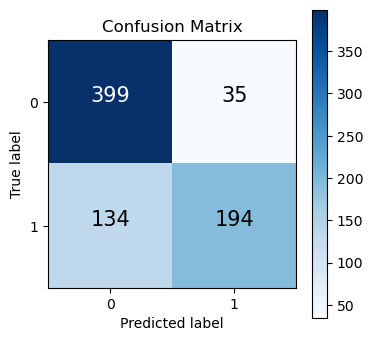

In [85]:
# Get baseline results
calculate_results(y_true=val_labels,
                  y_pred=model_0.predict(val_sentences),
                  cf_matrix=True)

### Model 1: Simple dense model

In [87]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [121]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [128]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [122]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [127]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240331-113055
Epoch 1/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1672 - accuracy: 0.9416 - val_loss: 0.5711 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1477 - accuracy: 0.9498 - val_loss: 0.6093 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1309 - accuracy: 0.9543 - val_loss: 0.6407 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1177 - accuracy: 0.9603 - val_loss: 0.6782 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1058 - accuracy: 0.9641 - val_loss: 0.7204 - val_accuracy: 0.7454


In [141]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.7454


[0.7203541994094849, 0.7454068064689636]

In [164]:
model_1_preds = model_1.predict(val_sentences)
model_1_preds.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [165]:
print(f"model 1 preds:\n {model_1_preds[:5]}, {model_1_preds.shape}\n\nval labels:\n{val_labels[:5]}, {val_labels.shape}")

model 1 preds:
 [[0.04177986]
 [0.99999857]
 [0.23748991]
 [0.2829174 ]
 [0.23905206]], (762, 1)

val labels:
[0 1 1 1 0], (762,)


I need to reshape the model_1_preds to 1 dimension and turn the values to 0 or 1

In [166]:
model_1_preds = model_1_preds.flatten()
model_1_preds = [0 if value < 0.5 else 1 for value in model_1_preds]

{'accuracy': 74.54068241469817,
 'precision': 0.7443165758126389,
 'recall': 0.7454068241469817,
 'f1': 0.7445284200900228}

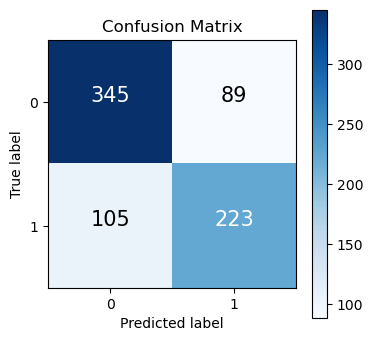

In [170]:
calculate_results(y_true=val_labels,
                  y_pred=model_1_preds,
                  cf_matrix=True)

---
## Visualizing learned embeddings🔑

In [171]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


We can use the **Embedding Projector tool** to visualize our embedding.

To use the Embedding Projector tool, we need two files:

* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

To download them to file, I'm going to use the [code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/text/guide/word_embeddings?hl=es-419#retrieve_the_trained_word_embeddings_and_save_them_to_disk).

In [173]:
import io 

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

Once you've downloaded the embedding vectors and metadata, you can visualize them using [Embedding Vector tool](http://projector.tensorflow.org/)

---
### Model 2: LSTM

In [191]:
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


> ⚠️**LSTM layer** expect an input 3D vector. Therefore, if I want to stack RNN cells, it is necessary to put ```return_sequences = True``` to get a 3D vector output (if ```return_sequences = False```, it will return a 2D vector)

In [192]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [193]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [195]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240331-231006
Epoch 1/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0777 - accuracy: 0.9693 - val_loss: 1.1905 - val_accuracy: 0.7428
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0701 - accuracy: 0.9712 - val_loss: 1.3261 - val_accuracy: 0.7270
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0494 - accuracy: 0.9794 - val_loss: 1.2915 - val_accuracy: 0.7310
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0446 - accuracy: 0.9794 - val_loss: 1.5623 - val_accuracy: 0.7323
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0394 - accuracy: 0.9806 - val_loss: 1.5402 - val_accuracy: 0.7428


In [196]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

2024-03-31 23:10:28.074853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 23:10:28.159473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 7ms/step


((762, 1),
 array([[4.3101096e-05],
        [9.9998295e-01],
        [2.1706974e-04],
        [5.8515915e-03],
        [1.4303263e-01],
        [6.2672239e-05],
        [9.6934021e-01],
        [7.7725548e-05],
        [9.9992144e-01],
        [9.9996459e-01]], dtype=float32))

In [197]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)>

{'accuracy': 74.2782152230971,
 'precision': 0.7425712158572018,
 'recall': 0.7427821522309711,
 'f1': 0.7387782134356244}

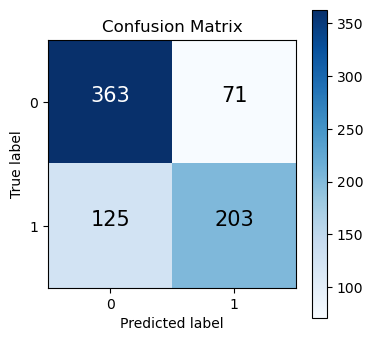

In [198]:
calculate_results(y_true=val_labels,
                  y_pred=model_2_preds,
                  cf_matrix=True)

### Model 3: GRU

The GRU cell has similar features to an LSTM cell but has less parameters.

In [199]:
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [200]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [201]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [203]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240331-232234
Epoch 1/5
215/215 [==============================] - 5s 18ms/step - loss: 0.0861 - accuracy: 0.9711 - val_loss: 0.9089 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0747 - accuracy: 0.9752 - val_loss: 0.9352 - val_accuracy: 0.7375
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0597 - accuracy: 0.9781 - val_loss: 1.1440 - val_accuracy: 0.7205
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0535 - accuracy: 0.9772 - val_loss: 1.2367 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0477 - accuracy: 0.9787 - val_loss: 1.2667 - val_accuracy: 0.7126


In [204]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

 1/24 [>.............................] - ETA: 8s

2024-03-31 23:23:27.956866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-31 23:23:28.030475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[3.7129378e-04],
        [9.9993563e-01],
        [9.9544770e-01],
        [1.9252221e-01],
        [7.1228731e-01],
        [1.0472807e-03],
        [7.8470868e-01],
        [2.0866215e-03],
        [9.9981886e-01],
        [9.9987316e-01]], dtype=float32))

In [205]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 0., 1., 0., 1., 1.], dtype=float32)>

{'accuracy': 71.25984251968504,
 'precision': 0.7109796254170309,
 'recall': 0.7125984251968503,
 'f1': 0.711240622481245}

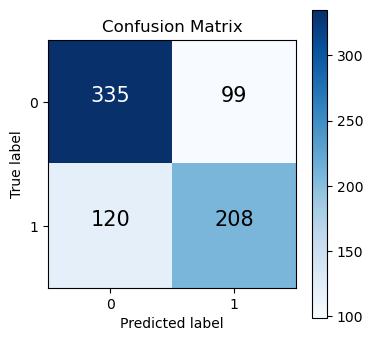

In [207]:
calculate_results(y_true=val_labels, 
                  y_pred=model_3_preds,
                  cf_matrix=True)

### Model 4: Bidirectional RNN model

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

*It's a good option for sequences which may benefit from passing forward and backwards*

In [208]:
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [209]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [210]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [213]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240331-233539
Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.0584 - accuracy: 0.9780 - val_loss: 1.2772 - val_accuracy: 0.7454
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 1.2554 - val_accuracy: 0.7480
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0444 - accuracy: 0.9801 - val_loss: 1.3090 - val_accuracy: 0.7336
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0438 - accuracy: 0.9801 - val_loss: 1.3955 - val_accuracy: 0.7336
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0419 - accuracy: 0.9809 - val_loss: 1.3005 - val_accuracy: 0.7546


In [215]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

24/24 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)>

{'accuracy': 75.45931758530183,
 'precision': 0.7540786757203202,
 'recall': 0.7545931758530183,
 'f1': 0.7516039129778388}

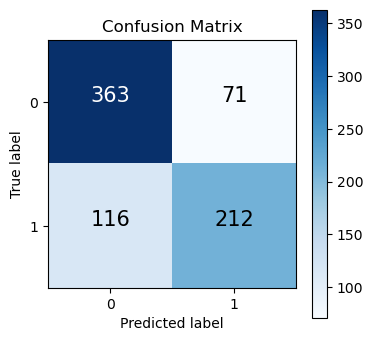

In [216]:
calculate_results(y_true=val_labels, 
                  y_pred=model_4_preds,
                  cf_matrix=True)

### Model 5: Conv1D